# Chapter 18: Taming Deep Networks

## Hands On: The 10 Epochs Challenge

In [1]:
%matplotlib inline

In [2]:
# Plot the training loss and validation loss from a Keras history object.

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


def show_losses(history):
    sns.set()  # Switch to the Seaborn look
    plt.plot(history.history['loss'], label='Training set',
             color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation set',
             color='green', linestyle='--')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.xlim(0, len(history.history['loss']))
    plt.show()

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = mnist.load_data()
X_train = X_train_raw.reshape(X_train_raw.shape[0], -1) / 255
X_test_all = X_test_raw.reshape(X_test_raw.shape[0], -1) / 255
X_validation, X_test = np.split(X_test_all, 2)
Y_train = to_categorical(Y_train_raw)
Y_validation, Y_test = np.split(to_categorical(Y_test_raw), 2)

In [5]:
model = Sequential()
model.add(Dense(1200, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

In [7]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_validation, Y_validation),
                    epochs=10, batch_size=32)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 258us/step - loss: 1.3117 - acc: 0.5394 - val_loss: 0.6256 - val_acc: 0.7984
Epoch 2/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.4375 - acc: 0.8671 - val_loss: 0.4665 - val_acc: 0.8600
Epoch 3/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.3560 - acc: 0.8944 - val_loss: 0.3680 - val_acc: 0.8878
Epoch 4/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.3125 - acc: 0.9074 - val_loss: 0.3599 - val_acc: 0.8920
Epoch 5/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.2820 - acc: 0.9153 - val_loss: 0.3098 - val_acc: 0.9042
Epoch 6/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.2584 - acc: 0.9223 - val_loss: 0.3005 - val_acc: 0.9076
Epoch 7/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.2422 - acc: 0.9261 - val_loss: 0.2

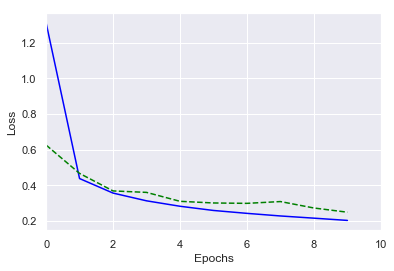

In [8]:
show_losses(history)

Now It's Your Turn!

In [13]:
# Write your code here...